<a href="https://colab.research.google.com/github/MilindiSenevirathne/COVID-19_Test/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from plotnine import *
import plotly.express as px
import json
import IPython
from plotnine import *

#Dengue Dataset

In [2]:
dengue_df = pd.read_csv('/content/sample_data/dengue data sri lanka.csv', sep = r'\s*,\s*', engine = 'python')
dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude
0,2006,52,12/23/2006,12/29/2006,Colombo,71,NaN,NaN
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,NaN,NaN
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,NaN,NaN
3,2006,52,12/23/2006,12/29/2006,Kandy,20,NaN,NaN
4,2006,52,12/23/2006,12/29/2006,Matale,4,NaN,NaN


In [3]:
dengue_df.isnull().sum()

year              0
week              0
start.date        0
end.date          0
District          0
cases             0
Latitude      21960
Longitude     21960
dtype: int64

In [4]:
districts = pd.read_csv('/content/sample_data/sl_locations.csv')
districts.head()

,District,Latitude,Longitude
0,Colombo,6.927079,79.861243
1,Gampaha,7.084048,80.009831
2,Kalutara,6.585395,79.960740
3,Kandy,7.290572,80.633726
4,Matale,7.467465,80.623416


In [5]:
dengue_df = pd.merge(dengue_df, districts, on='District', how='left', suffixes=('', '_new'))
dengue_df['Latitude'] = dengue_df['Latitude'].fillna(dengue_df['Latitude_new'])
dengue_df['Longitude'] = dengue_df['Longitude'].fillna(dengue_df['Longitude_new'])
dengue_df.drop(['Latitude_new', 'Longitude_new'], axis=1, inplace=True)
dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude
0,2006,52,12/23/2006,12/29/2006,Colombo,71,6.927079,79.861243
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,7.084048,80.009831
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,6.585395,79.960740
3,2006,52,12/23/2006,12/29/2006,Kandy,20,7.290572,80.633726
4,2006,52,12/23/2006,12/29/2006,Matale,4,7.467465,80.623416


In [12]:
dengue_df = gpd.GeoDataFrame(dengue_df, geometry=gpd.points_from_xy(
    dengue_df.Longitude, dengue_df.Latitude
))

dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude,geometry
0,2006,52,12/23/2006,12/29/2006,Colombo,71,6.927079,79.861243,POINT (79.86124 6.92708)
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,7.084048,80.009831,POINT (80.00983 7.08405)
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,6.585395,79.960740,POINT (79.96074 6.58539)
3,2006,52,12/23/2006,12/29/2006,Kandy,20,7.290572,80.633726,POINT (80.63373 7.29057)
4,2006,52,12/23/2006,12/29/2006,Matale,4,7.467465,80.623416,POINT (80.62342 7.46746)


In [14]:
dengue_df.describe()

,year,week,cases,Latitude,Longitude
count,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000
mean,2014.580965,26.435883,29.621812,7.581550,80.636483
std,4.675167,15.176584,81.976917,1.014612,0.575642
min,2006.000000,1.000000,0.000000,5.949631,79.839386
25%,2011.000000,13.000000,2.000000,6.927079,80.216791
50%,2015.000000,26.000000,8.000000,7.358070,80.522547
75%,2019.000000,40.000000,26.000000,8.311352,81.054981
max,2023.000000,53.000000,2631.000000,9.661498,81.830633


/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale.py:143: PlotnineWarning: scale_fill_gradient2 could not recognise parameter `high_l`


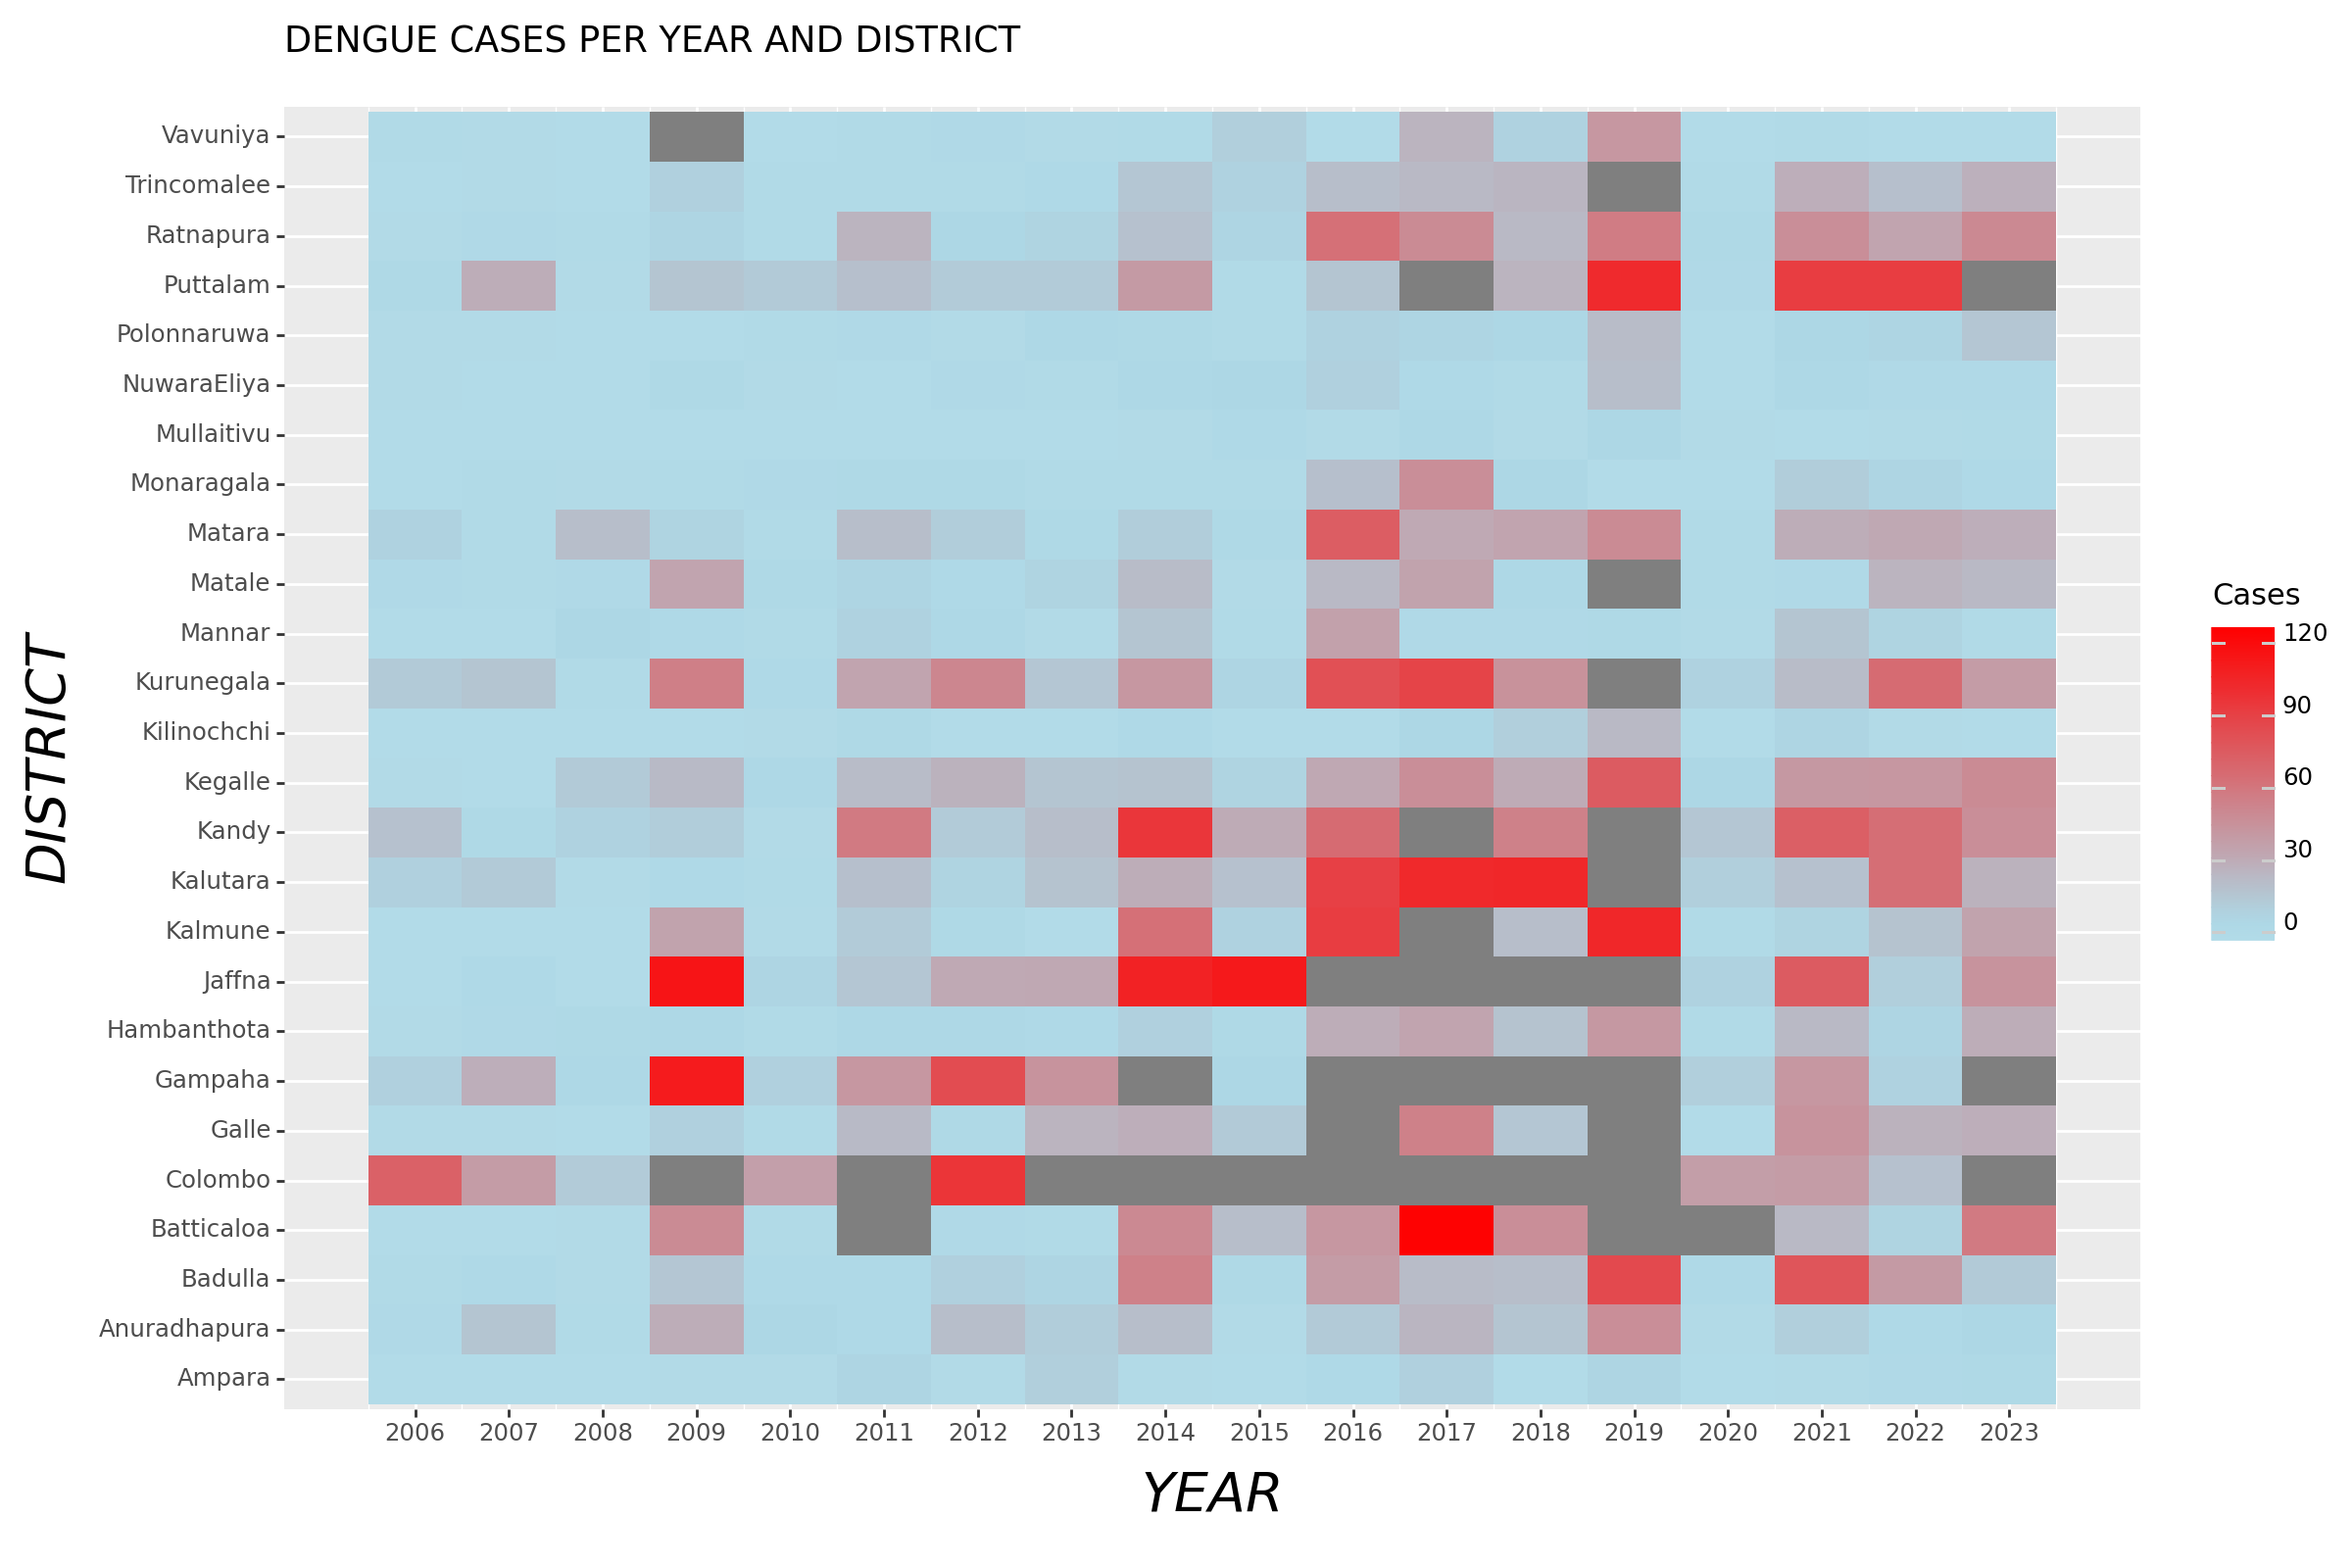

<Figure Size: (1200 x 800)>

In [25]:
midpoint_value = dengue_df['cases'].quantile(0.5)

max_value = dengue_df['cases'].quantile(0.95)

(
    ggplot(dengue_df, aes('year', 'District', fill='cases')) +
    geom_tile() +
    scale_fill_gradient2(low="white", mid="lightblue", high="red",
                         midpoint=midpoint_value,
                         limits=[0, max_value],
                         high_l=0.5) +
    scale_x_continuous(breaks=range(2006, 2024, 1)) +
    labs(x="YEAR", y="DISTRICT", fill="Cases",
         title="DENGUE CASES PER YEAR AND DISTRICT") +
    theme(
        axis_title_x=element_text(size=20, face="italic"),
        axis_title_y=element_text(size=20, face="italic"),
        figure_size=(12, 8)
    )
)

In [31]:
sl_map  = dengue_df.groupby(['year', 'District','Latitude','Longitude'])['cases'].sum()


sl_map = sl_map.reset_index()
sl_map.head()
sl_map['size'] = sl_map['cases']*90000000
sl_map
fig = px.scatter_mapbox(sl_map, lat="Latitude", lon="Longitude",
                     color="cases", size='size',hover_data=['District'],
                     color_continuous_scale='burgyl', animation_frame="year",
                     title='Spread total cases over time in Sri Lanka')
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center = {"lat":7.8731,"lon":80.7718})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:1902: FutureWarning:

You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.



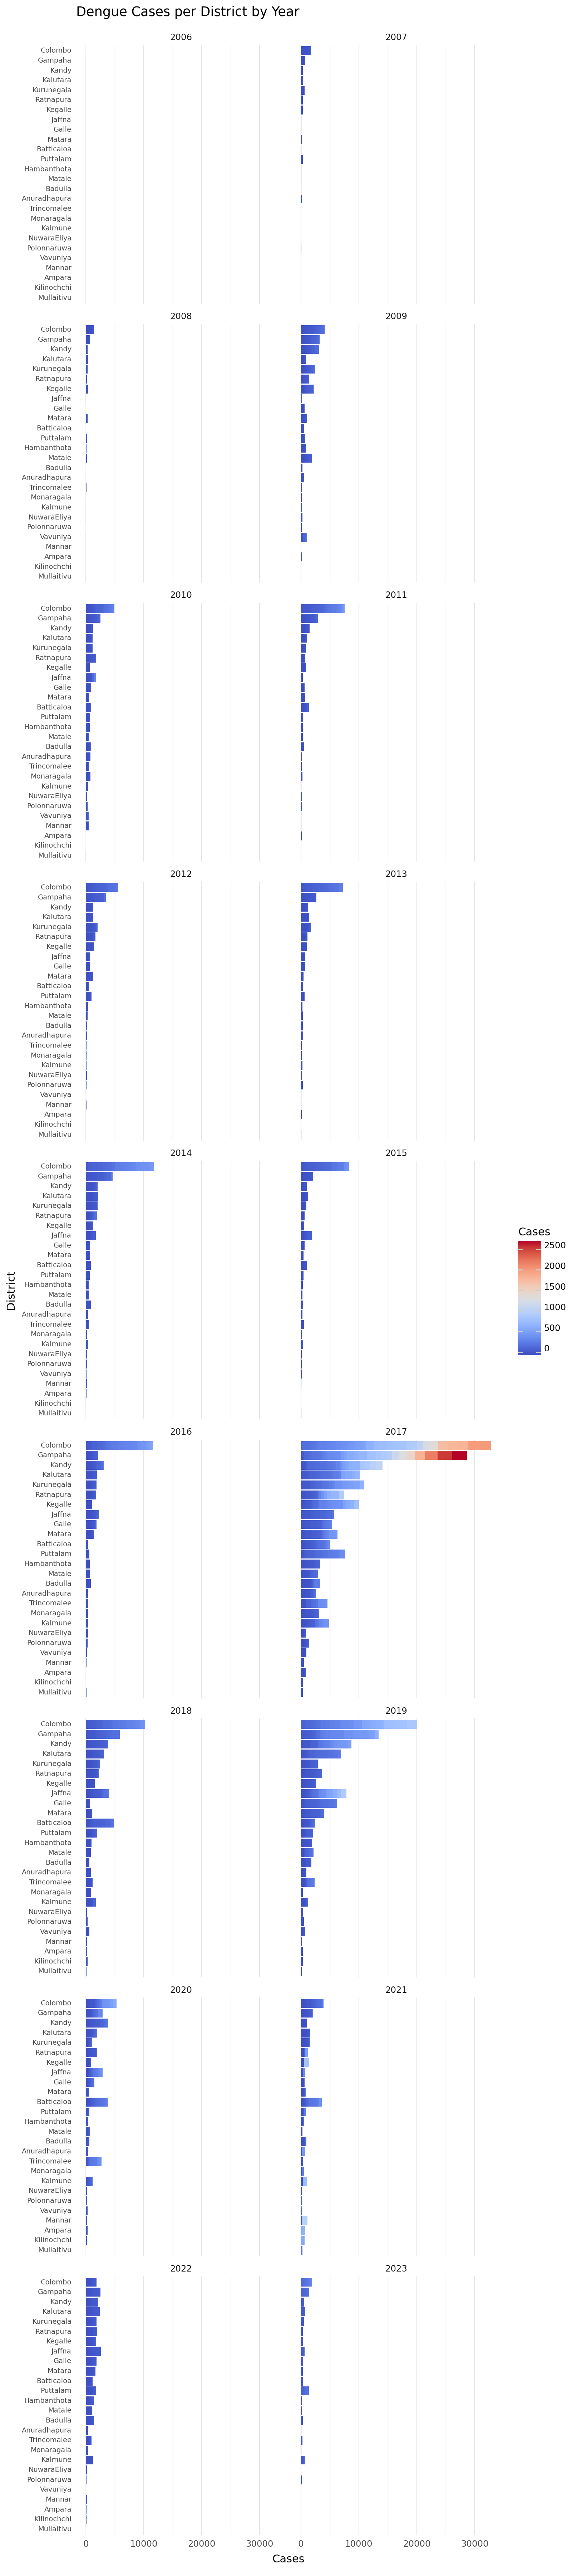

In [42]:
dengue_df_sorted = dengue_df.sort_values(['year', 'cases'])

number_of_years = dengue_df_sorted['year'].nunique()
nrows = int(np.ceil(number_of_years / 2))

diverging_plots = (
    ggplot(dengue_df_sorted, aes(x='reorder(District, cases)', y='cases', fill='cases')) +
    geom_col() +
    coord_flip() +
    scale_fill_cmap('coolwarm') +
    facet_wrap('~year', nrow=nrows) +
    labs(y='Cases', x='District', fill='Cases',
         title='Dengue Cases per District by Year') +
    theme_minimal() +
    theme(
        panel_grid_major_y=element_blank(),
        panel_grid_minor_y=element_blank(),
        axis_text_y=element_text(size=7, angle=0),
        figure_size=(8, 4 * nrows),
        subplots_adjust={'wspace': 0.2, 'hspace': 0.3}
    )
)

# Show the plot only once
diverging_plots.draw()

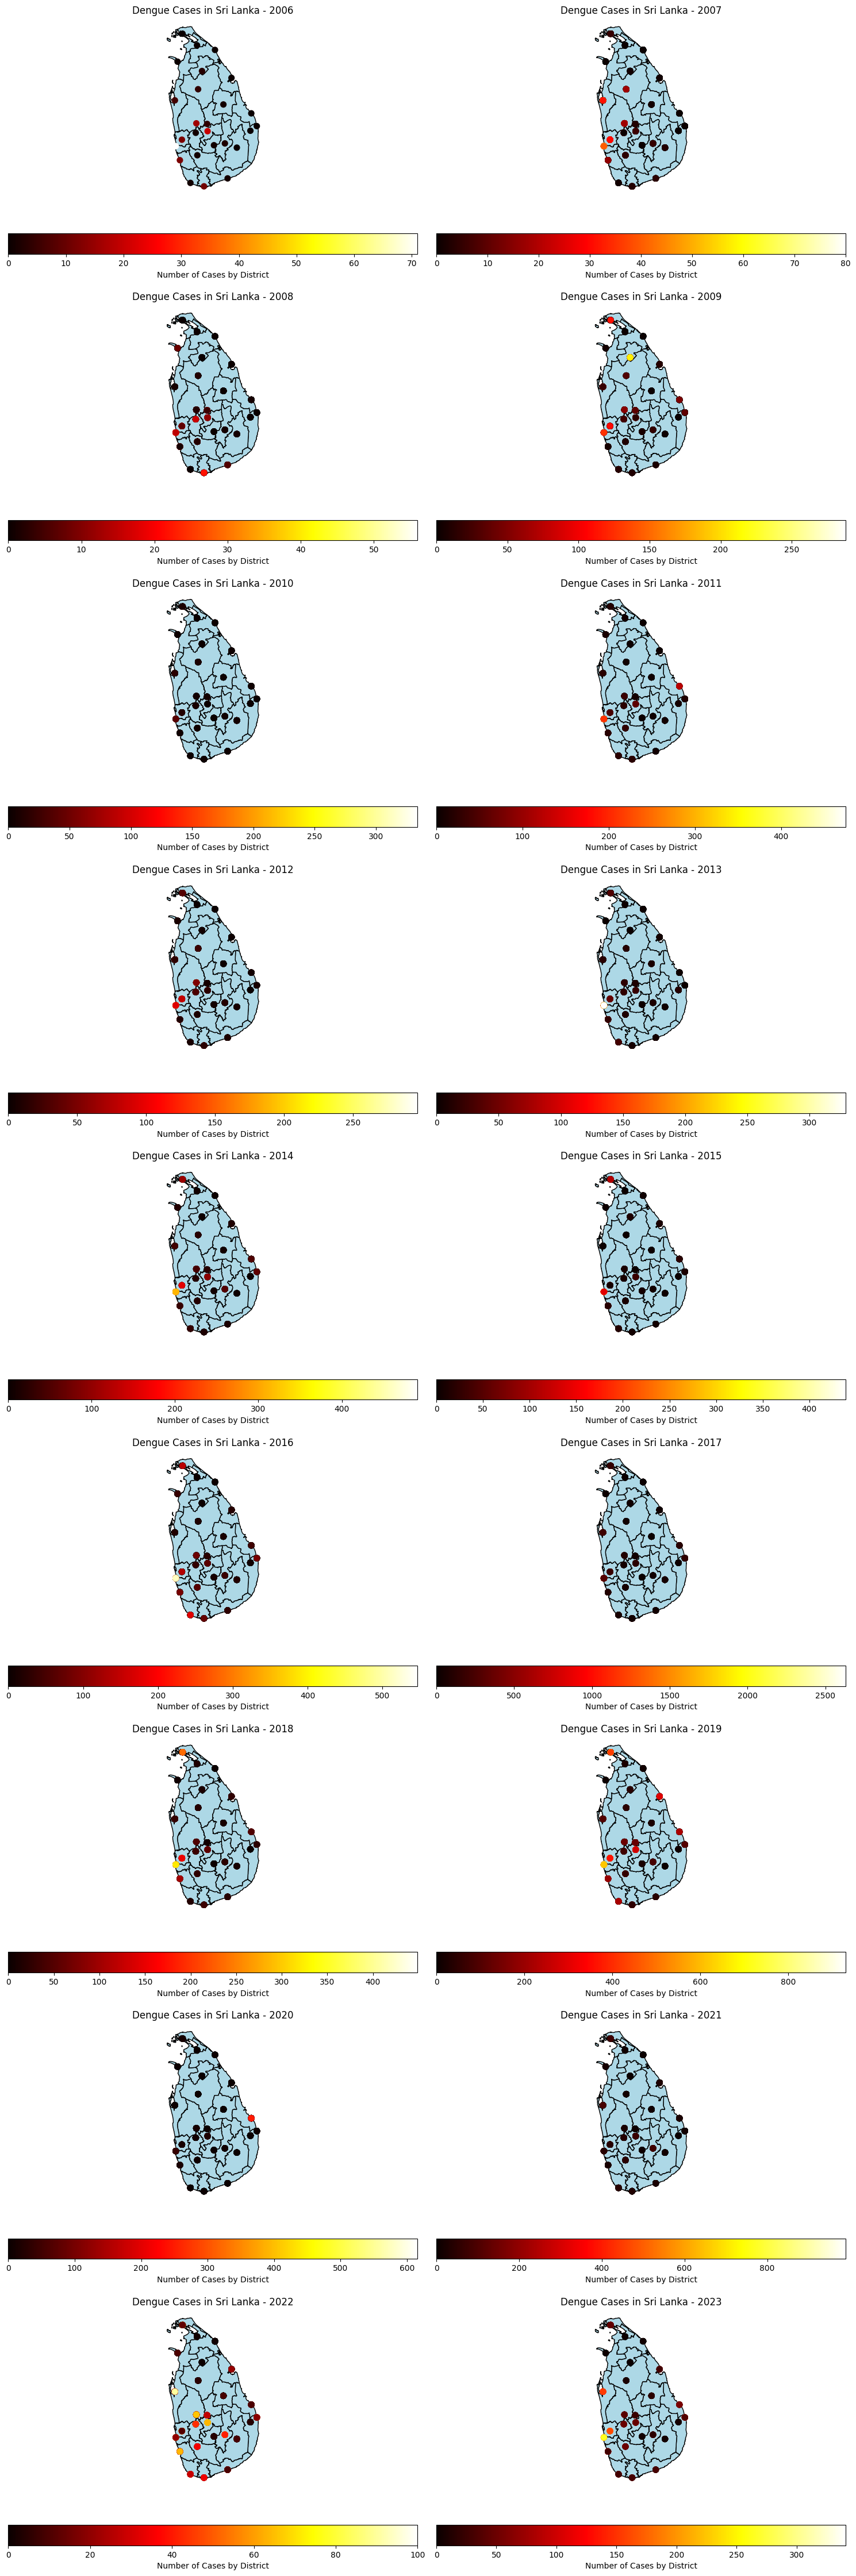

In [7]:
sri_lanka_map = gpd.read_file('/content/sample_data/sl.geojson')

dengue_df = gpd.GeoDataFrame(dengue_df, geometry='geometry')

unique_years = dengue_df['year'].unique()
num_years = len(unique_years)
num_cols = 2

num_rows = int(np.ceil(num_years / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, year in enumerate(sorted(unique_years)):
    row_index = i // num_cols
    col_index = i % num_cols

    ax = axs[row_index, col_index]

    sri_lanka_map.plot(ax=ax, color='lightblue', edgecolor='black')

    year_data = dengue_df[dengue_df['year'] == year]
    year_data.plot(ax=ax, column='cases', cmap='hot', markersize=50, legend=True,
                   legend_kwds={'label': "Number of Cases by District",
                                'orientation': "horizontal"})

    ax.set_title(f'Dengue Cases in Sri Lanka - {year}')
    ax.axis('off')

plt.tight_layout()
plt.show()